#### Library Imports and Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [31]:
# Import the first dataset
pl_data = pd.read_csv('fplAnalytics-playerStautsData.csv')
# Import second dataset
fpl_data = pd.read_csv(r"C:\Users\seano\Downloads\archive\players.csv")

#### Data Preparation

In [32]:
#Take initial look at both datasets
pl_data

,name,team,position,cost,status,minutes,total_points,bonus,points_per_game,selected_by_percent
0,Balogun,ARS,FWD,4.5,Available,0,0,0,0.0,2.0
1,Cédric,ARS,DEF,4.0,Available,223,10,0,1.2,0.4
2,M.Elneny,ARS,MID,4.5,Available,111,6,0,1.2,0.2
3,Fábio Vieira,ARS,MID,5.5,Available,500,40,2,1.8,0.1
4,Gabriel,ARS,DEF,5.0,Available,3409,146,15,3.8,17.2
...,...,...,...,...,...,...,...,...,...,...
583,Sarabia,WOL,MID,5.0,Available,764,27,3,2.1,0.1
584,Šarkić,WOL,GKP,4.0,Available,0,0,0,0.0,2.4
585,N.Semedo,WOL,DEF,4.5,Available,2633,75,5,2.1,0.3
586,Toti,WOL,DEF,4.5,Available,978,43,4,2.5,0.2


In [33]:
fpl_data

,id,name,now_cost,position,team,clean_sheets_per_90,threat_rank_type,expected_assists_per_90,expected_assists,points_per_game_rank,...,threat_rank,ep_this,transfers_in,bps,goals_conceded_per_90,selected_by_percent,influence_rank_type,points_per_game_rank_type,clean_sheets,now_cost_rank
0,3,Granit Xhaka,48,MID,Arsenal,0.39,38,0.12,3.89,47,...,62,7.3,942505,634,1.05,2.7,23,23,13,265
1,4,Mohamed Elneny,41,MID,Arsenal,0.00,233,0.03,0.04,457,...,593,0.0,202760,27,1.62,0.6,226,201,0,634
2,5,Rob Holding,42,DEF,Arsenal,0.00,118,0.02,0.15,405,...,341,0.7,23338,120,2.08,0.2,137,144,0,598
3,6,Thomas Partey,47,MID,Arsenal,0.40,90,0.08,2.17,210,...,152,1.9,110171,468,1.02,0.4,47,80,11,311
4,7,Martin Ødegaard,69,MID,Arsenal,0.37,8,0.23,8.02,7,...,18,6.9,7014051,813,1.09,33.3,3,3,13,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,682,Matheus Santos Carneiro Da Cunha,53,FWD,Wolves,0.47,46,0.02,0.17,265,...,169,0.7,78699,122,1.12,0.1,40,36,5,153
774,698,Mario Lemina,45,MID,Wolves,0.35,188,0.03,0.46,355,...,385,1.5,4325,196,1.94,0.0,125,146,5,359
775,704,Pablo Sarabia,49,MID,Wolves,0.35,122,0.10,0.89,293,...,209,0.3,50058,57,1.06,0.1,164,116,3,225
776,717,Daniel Bentley,40,GKP,Wolves,0.00,32,0.00,0.00,150,...,521,1.0,6232,45,1.50,0.0,32,25,0,651


In [34]:
fpl_data.columns.tolist()

['id',
 'name',
 'now_cost',
 'position',
 'team',
 'clean_sheets_per_90',
 'threat_rank_type',
 'expected_assists_per_90',
 'expected_assists',
 'points_per_game_rank',
 'goals_scored',
 'penalties_missed',
 'creativity_rank_type',
 'transfers_out',
 'value_form',
 'direct_freekicks_order',
 'value_season',
 'bonus',
 'starts_per_90',
 'cost_change_start',
 'news_added',
 'expected_goals_conceded',
 'cost_change_start_fall',
 'expected_goals_conceded_per_90',
 'red_cards',
 'threat',
 'selected_rank_type',
 'influence',
 'penalties_saved',
 'corners_and_indirect_freekicks_order',
 'ep_next',
 'event_points',
 'web_name',
 'creativity',
 'ict_index_rank',
 'saves_per_90',
 'creativity_rank',
 'expected_goals',
 'own_goals',
 'status',
 'now_cost_rank_type',
 'saves',
 'yellow_cards',
 'goals_conceded',
 'news',
 'expected_goal_involvements_per_90',
 'assists',
 'form_rank_type',
 'ict_index_rank_type',
 'chance_of_playing_next_round',
 'influence_rank',
 'penalties_order',
 'ict_index'

In [35]:
fpl_columns_to_keep = ['name', 'now_cost', 'cost_change_start', 'position', 'team', 'minutes', 'total_points', 'points_per_game', 'bonus', 'goals_scored', 'expected_goals', 'assists', 'expected_assists', 'starts', 'clean_sheets']
fpl_data = fpl_data[fpl_columns_to_keep]

In [36]:
fpl_data.sort_values('total_points', ascending=False, inplace=True)
fpl_data.head(5)

,name,now_cost,cost_change_start,position,team,minutes,total_points,points_per_game,bonus,goals_scored,expected_goals,assists,expected_assists,starts,clean_sheets
489,Erling Haaland,124,9,FWD,Man City,2767,272,7.8,40,36,28.54,9,3.11,33,13
673,Harry Kane,115,0,FWD,Spurs,3406,263,6.9,48,30,20.95,9,4.01,38,11
445,Mohamed Salah,131,1,MID,Liverpool,3290,239,6.3,23,19,21.01,13,7.03,37,13
4,Martin Ødegaard,69,4,MID,Arsenal,3132,212,5.7,30,15,9.75,8,8.02,37,13
516,Marcus Rashford,72,7,MID,Man Utd,2880,205,5.9,21,17,15.27,7,2.86,32,13


I want to filter out rows where players have played less than 450 minutes in the whole season. 450 minutes is equivalent to 5 full games. I consider those who played less than this to be outliers which skew the data.

In [87]:
# Filter out rows where 'minutes' column is less than 450
pl_data = pl_data[pl_data['minutes'] > 450]

# Filter out rows where 'minutes' column is less than 450
fpl_data = fpl_data[fpl_data['minutes'] > 450] 

In [38]:
fpl_data.head(5)

,name,now_cost,cost_change_start,position,team,minutes,total_points,points_per_game,bonus,goals_scored,expected_goals,assists,expected_assists,starts,clean_sheets
489,Erling Haaland,124,9,FWD,Man City,2767,272,7.8,40,36,28.54,9,3.11,33,13
673,Harry Kane,115,0,FWD,Spurs,3406,263,6.9,48,30,20.95,9,4.01,38,11
445,Mohamed Salah,131,1,MID,Liverpool,3290,239,6.3,23,19,21.01,13,7.03,37,13
4,Martin Ødegaard,69,4,MID,Arsenal,3132,212,5.7,30,15,9.75,8,8.02,37,13
516,Marcus Rashford,72,7,MID,Man Utd,2880,205,5.9,21,17,15.27,7,2.86,32,13


#### Merge the two dataframes to add next season cost to the previous season data

In [39]:
# Reduce pl_data to only the columns we care about
pl_data_reduced = pl_data[['minutes', 'total_points', 'points_per_game', 'bonus', 'cost']]

In [40]:
# Perform the merge
data = pd.merge(fpl_data, pl_data_reduced, how='inner', on=['minutes', 'total_points', 'points_per_game', 'bonus'])

In [41]:
# Rename columns
data = data.rename(columns={'now_cost': '22/23_end_cost', 'cost': '23/24_cost'})

# Move "23/24_cost" to the 4th position
data.insert(3, "23/24_cost", data.pop("23/24_cost"))

# Divide "22/23_cost" values by 10
data["22/23_end_cost"] = data["22/23_end_cost"] / 10
data

,name,22/23_end_cost,cost_change_start,23/24_cost,position,team,minutes,total_points,points_per_game,bonus,goals_scored,expected_goals,assists,expected_assists,starts,clean_sheets
0,Erling Haaland,12.4,9,14.0,FWD,Man City,2767,272,7.8,40,36,28.54,9,3.11,33,13
1,Harry Kane,11.5,0,12.5,FWD,Spurs,3406,263,6.9,48,30,20.95,9,4.01,38,11
2,Mohamed Salah,13.1,1,12.5,MID,Liverpool,3290,239,6.3,23,19,21.01,13,7.03,37,13
3,Martin Ødegaard,6.9,4,8.5,MID,Arsenal,3132,212,5.7,30,15,9.75,8,8.02,37,13
4,Marcus Rashford,7.2,7,9.0,MID,Man Utd,2880,205,5.9,21,17,15.27,7,2.86,32,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,Lewis Hall,4.3,-2,4.5,MID,Chelsea,653,19,2.1,3,0,0.83,0,1.46,8,1
305,Ben Godfrey,4.3,-2,4.5,DEF,Everton,801,18,1.4,0,0,1.24,1,0.08,10,1
306,Mason Holgate,4.2,-3,4.0,DEF,Everton,506,16,2.0,2,0,1.00,0,0.17,5,2
307,Jonjo Shelvey,4.8,-2,5.0,MID,Nott'm Forest,573,16,1.5,0,0,0.19,0,0.66,6,1


In [42]:
# Create new column '22/23_start_cost
data['22/23_start_cost'] = data['22/23_end_cost'] - (data['cost_change_start'] / 10)

data.head()

,name,22/23_end_cost,cost_change_start,23/24_cost,position,team,minutes,total_points,points_per_game,bonus,goals_scored,expected_goals,assists,expected_assists,starts,clean_sheets,22/23_start_cost
0,Erling Haaland,12.4,9,14.0,FWD,Man City,2767,272,7.8,40,36,28.54,9,3.11,33,13,11.5
1,Harry Kane,11.5,0,12.5,FWD,Spurs,3406,263,6.9,48,30,20.95,9,4.01,38,11,11.5
2,Mohamed Salah,13.1,1,12.5,MID,Liverpool,3290,239,6.3,23,19,21.01,13,7.03,37,13,13.0
3,Martin Ødegaard,6.9,4,8.5,MID,Arsenal,3132,212,5.7,30,15,9.75,8,8.02,37,13,6.5
4,Marcus Rashford,7.2,7,9.0,MID,Man Utd,2880,205,5.9,21,17,15.27,7,2.86,32,13,6.5


Now I'm going to check all columns for any NaN values. 

In [43]:
data.isna().any()

name                 False
22/23_end_cost       False
cost_change_start    False
23/24_cost           False
position             False
team                 False
minutes              False
total_points         False
points_per_game      False
bonus                False
goals_scored         False
expected_goals       False
assists              False
expected_assists     False
starts               False
clean_sheets         False
22/23_start_cost     False
dtype: bool

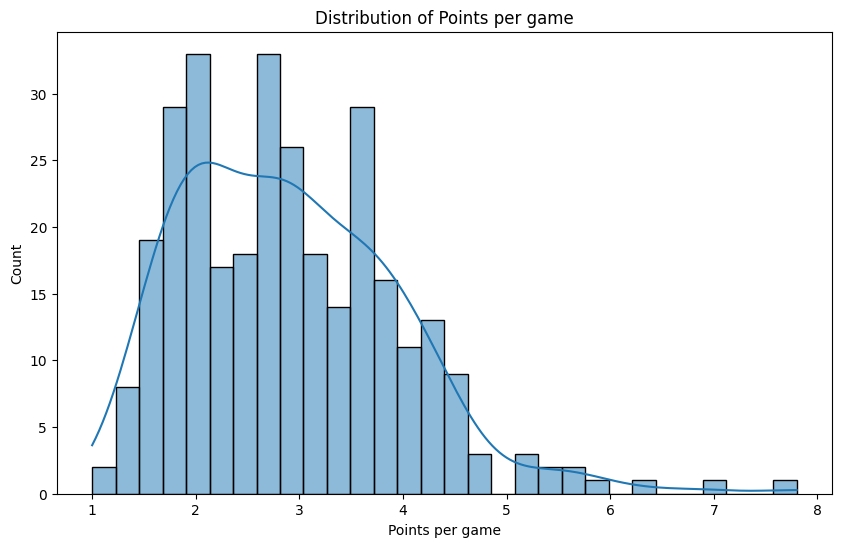

In [95]:
plt.figure(figsize=(10, 6))
sns.histplot(data['points_per_game'], bins=30, kde=True)
plt.title('Distribution of Points per game')
plt.xlabel('Points per game')
plt.show()

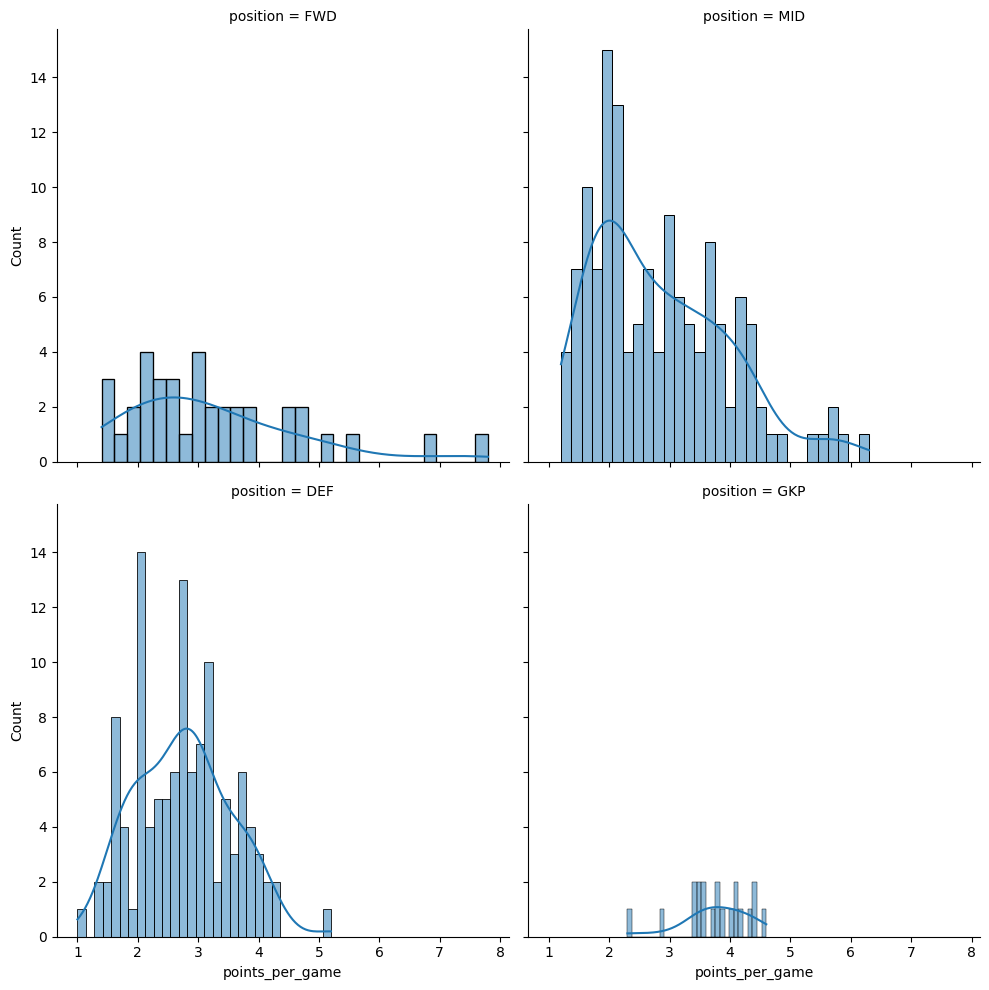

In [96]:
# Define the grid
g = sns.FacetGrid(data, col="position", col_wrap=2, height=5)

# Map a histogram on each subplot
g = g.map(sns.histplot, "points_per_game", bins=30, kde=True)

# Show the plots
plt.show()

Now going to list all unique 'positions'.

#### Investigate the importance of 'position' and also compare player points vs cost for last season and upcoming season.

In [44]:
unique_positions = data['position'].unique()
print(unique_positions)

['FWD' 'MID' 'DEF' 'GKP']


I can use these to plot total points for last season versus player price for upcoming season, colour coded by position.

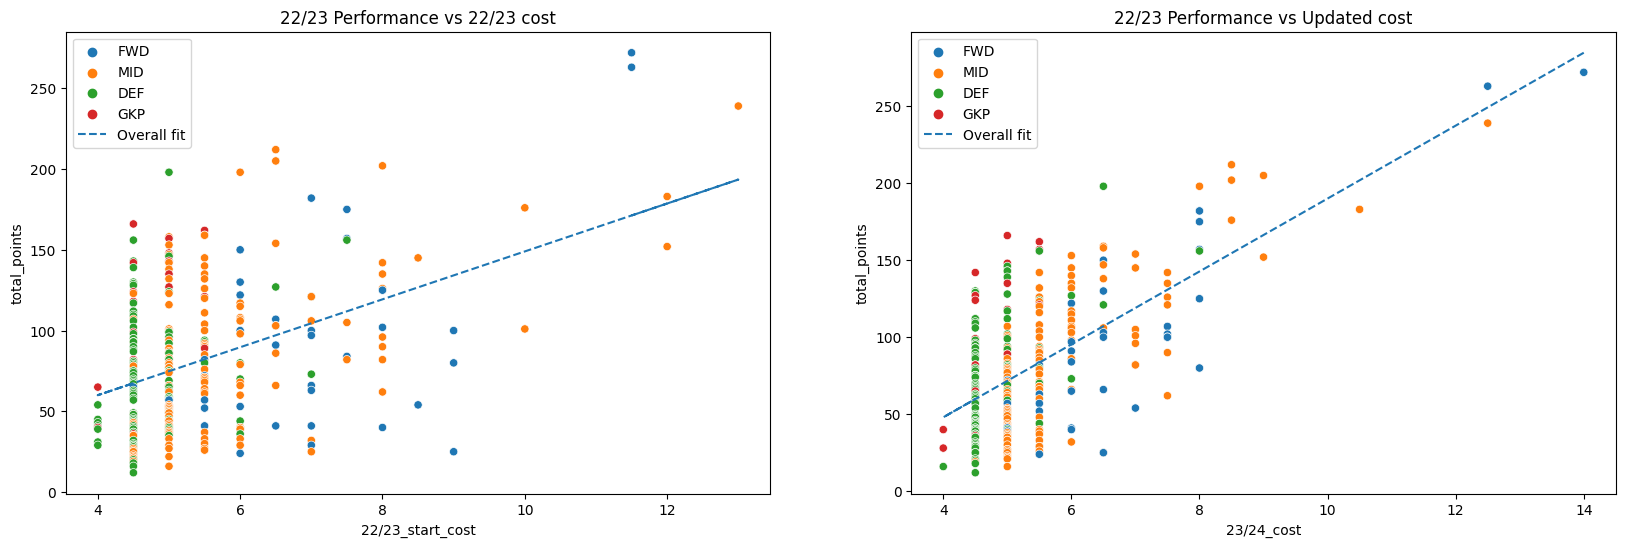

R-squared value for first plot: 0.20
R-squared value for second plot: 0.43


In [45]:
x1 = data['22/23_start_cost']
y1 = data['total_points']

x2 = data['23/24_cost']
y2 = data['total_points']

fig, axs = plt.subplots(1, 2, figsize=(20,6))

# First scatter plot
sns.scatterplot(x=x1, y=y1, hue='position', data=data, ax=axs[0])

# Calculating best fit line for first scatter plot
z1 = np.polyfit(x1, y1, 1)
p1 = np.poly1d(z1)
axs[0].plot(x1, p1(x1), "--", label="Overall fit")

# Set the title of the first plot
axs[0].set_title('22/23 Performance vs 22/23 cost')

# Set the x and y label of the first plot
axs[0].set_xlabel('22/23_start_cost')
axs[0].set_ylabel('total_points')

# Show the legend for the first plot
axs[0].legend()

# Second scatter plot
sns.scatterplot(x=x2, y=y2, hue='position', data=data, ax=axs[1])

# Calculating best fit line for second scatter plot
z2 = np.polyfit(x2, y2, 1)
p2 = np.poly1d(z2)
axs[1].plot(x2, p2(x2), "--", label="Overall fit")

# Set the title of the second plot
axs[1].set_title('22/23 Performance vs Updated cost')

# Set the x and y label of the second plot
axs[1].set_xlabel('23/24_cost')
axs[1].set_ylabel('total_points')

# Show the legend for the second plot
axs[1].legend()

# Display the plots
plt.show()

# Calculating R^2 value for first scatter plot
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(x1, y1)
print(f"R-squared value for first plot: {r_value1**2:.2f}")

# Calculating R^2 value for second scatter plot
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(x2, y2)
print(f"R-squared value for second plot: {r_value2**2:.2f}")

**It can be seen that difference between the observed values and the fitted values is much smaller for the upcoming season compared to last season, hence the higher R^2 value of 0.43 compared to 0.20. The outliers have been corrected to a higher starting price for the upcoming season.**

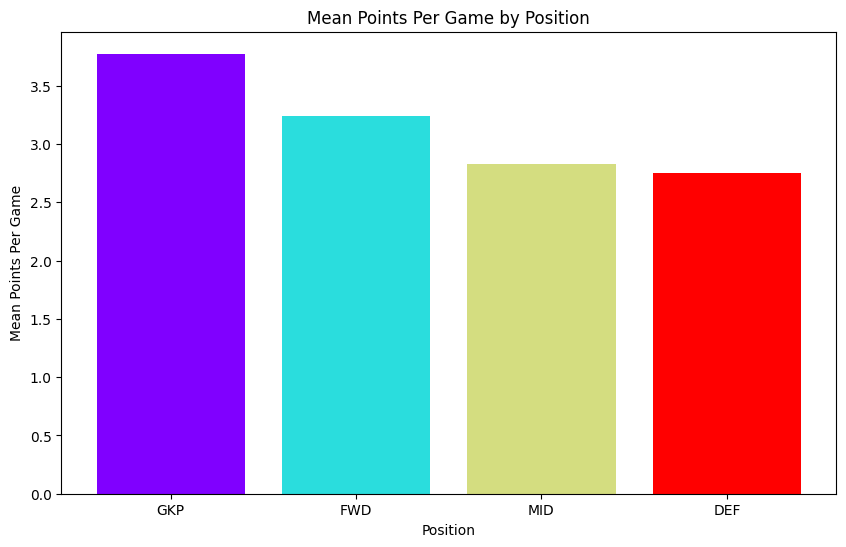

In [79]:
import matplotlib.cm as cm

# Calculate the mean of 'points_per_game' column for each 'position'
mean_points = data.groupby('position')['points_per_game'].mean()

# Create a color map
colors = cm.rainbow(np.linspace(0, 1, len(mean_points)))

# Create a bar plot of the mean points per minute with different colors for each bar
plt.figure(figsize=(10, 6))
plt.bar(mean_points.sort_values(ascending=False).index, mean_points.sort_values(ascending=False), color=colors)

# Add title and labels
plt.title('Mean Points Per Game by Position')
plt.xlabel('Position')
plt.ylabel('Mean Points Per Game')

# Display the plot
plt.show()

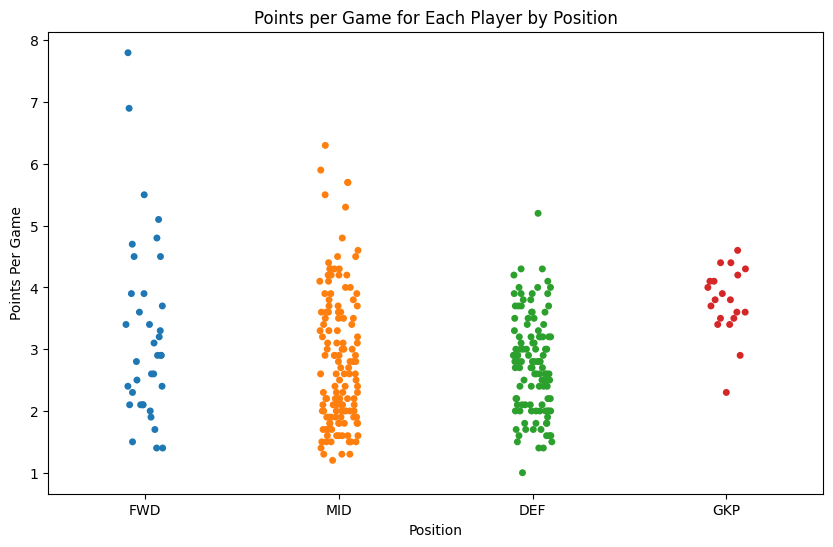

In [76]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.stripplot(x='position', y='points_per_game', data=data, jitter=True)

# Add title and labels
plt.title('Points per Game for Each Player by Position')
plt.xlabel('Position')
plt.ylabel('Points Per Game')

# Display the plot
plt.show()

Notice how the Goalkeepers have the narrowest range of values. This is for two reasons. Firstly there are fewer goalkeepers than players of other positions. Secondly, goalkeepers almost always play the full 90 minutes every game (unlike other positions), so this reduces the level of variance.

#### Aggregate FPL points for each team and check the number of contributing players per team

In [47]:
# Calculate total points for each team
team_points = fpl_data.groupby('team')['total_points'].sum().reset_index()

# Calculate player count for each team
player_count = fpl_data.groupby('team')['name'].nunique().reset_index()
player_count.rename(columns={'name': 'player_count'}, inplace=True)

# Calculate average points per player for each team
avg_points_per_player = team_points['total_points'] / player_count['player_count']
team_points['avg_points_per_player'] = avg_points_per_player

# Merge the player count and average points per player with team_points
team_points = team_points.merge(player_count, on='team')

# Sort the teams by total points in descending order
team_points_sorted = team_points.sort_values(by='total_points', ascending=False)

# Initialize an empty dataframe
output_df = pd.DataFrame(columns=['Team', 'Total Points', 'Player Count', 'Average Points per Player'])

# Append data to the dataframe
for index, row in team_points_sorted.iterrows():
    team = row['team']
    points = row['total_points']
    count = row['player_count']
    avg_points = row['avg_points_per_player']
    output_df = output_df.append({'Team': team, 
                                  'Total Points': points, 
                                  'Player Count': count, 
                                  'Average Points per Player': avg_points}, 
                                 ignore_index=True)
output_df.head()

,Team,Total Points,Player Count,Average Points per Player
0,Arsenal,2063,18,114.611111
1,Man City,1972,18,109.555556
2,Newcastle,1852,16,115.750000
3,Man Utd,1800,22,81.818182
4,Liverpool,1789,21,85.190476


#### Perform some web scraping to get the final Premier League standings for last season.

In [53]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.sportingnews.com/us/soccer/news/english-premier-league-table-2022-23-updated-epl-standings/jh3khedtjm3bbxccudntwq9h'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the first table on the page
table = soup.find('table')

# Get table headers for column names
headers = [header.text for header in table.find('tr').find_all('th')]

# Initialize a list to store the rows
scraped_data = []

# Get table rows
for row in table.find_all('tr')[1:]:  # skipping the header row
    cols = row.find_all('td')
    cols = [col.text.strip() for col in cols]
    scraped_data.append(cols)

# Convert data to DataFrame
df = pd.DataFrame(scraped_data, columns=headers)
df.head()

,Pos,Team,Points,Matches\n\tPlayed,Goals\n\tScored,Goal\n\tDifference
0,1.,Man City,89,38,94,+61
1,2.,Arsenal,84,38,88,+45
2,3.,Man United,75,38,58,+15
3,4.,Newcastle,71,38,68,+35
4,5.,Liverpool,67,38,75,+28


I need to slightly adjust some of the 'Team' names to ensure consistency between the scraped data and my original dataset.

In [54]:
# Define a dictionary with the old and new names
team_name_changes = {
    'Tottenham': 'Spurs',
    'Man United': 'Man Utd',
    'Leicester City-R': 'Leicester',
    'Leeds United-R': 'Leeds',
    'Southampton -\xa0R': 'Southampton', 
    "Nott'm\xa0Forest": "Nott'm Forest"
}

# Use the replace() function to change the team names
df['Team'] = df['Team'].replace(team_name_changes)
df = df.reset_index(drop=True)

#### Perform merge between scraped EPL standings 22/23 and my fantasy premier league dataset.

In [55]:
# Select the columns I want to keep from df
df = df[['Team', 'Pos', 'Points']]

# Merge the dataframes
merged_df = pd.merge(output_df, df, on='Team')

# Generate a new 'Rank' column from 1 to 20
merged_df['FPL Rank'] = range(1, len(merged_df) + 1)

# Rename some columns
merged_df = merged_df.rename(columns={'Total Points': 'FPL Points', 'Pos': 'EPL Rank', 'Points': 'EPL Points'})

# Reorder some columns
merged_df.insert(2, "EPL Rank", merged_df.pop("EPL Rank"))
merged_df.insert(3, "EPL Points", merged_df.pop("EPL Points"))

# Set 'Rank' as the new index
merged_df.set_index('FPL Rank', inplace=True)
merged_df

,Team,FPL Points,EPL Rank,EPL Points,Player Count,Average Points per Player
FPL Rank,,,,,,
1,Arsenal,2063,2.,84,18,114.611111
2,Man City,1972,1.,89,18,109.555556
3,Newcastle,1852,4.,71,16,115.750000
4,Man Utd,1800,3.,75,22,81.818182
5,Liverpool,1789,5.,67,21,85.190476
6,Brentford,1688,9.,59,20,84.400000
7,Brighton,1625,6.,62,19,85.526316
8,Spurs,1616,8.,60,20,80.800000
9,Aston Villa,1513,7.,61,16,94.562500


In [56]:
# Convert columns to int
merged_df['FPL Points'] = merged_df['FPL Points'].astype(int)
merged_df['EPL Rank'] = merged_df['EPL Rank'].str.replace('.', '').astype(int)
merged_df['EPL Points'] = merged_df['EPL Points'].astype(int)
merged_df['Player Count'] = merged_df['Player Count'].astype(int)

In [57]:
print(merged_df.dtypes)

Team                          object
FPL Points                     int32
EPL Rank                       int32
EPL Points                     int32
Player Count                   int32
Average Points per Player    float64
dtype: object


Now that I have converted the relevant columns into ints, I can examine the relationship between the fantasy points achieved by the entire squad of each team compared to where that team finished in the Premier League. I will assume a linear relationship and use linear regression.  

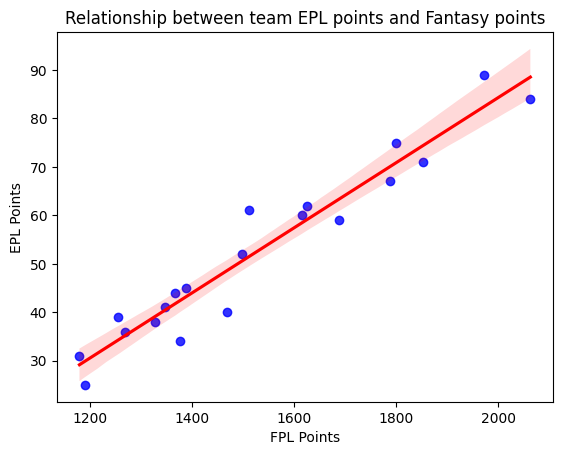

R-squared value: 0.93


In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the data
X = merged_df[['FPL Points']]
y = merged_df['EPL Points']
model.fit(X, y)

# Plot the data and the regression line
sns.regplot(x='FPL Points', y='EPL Points', data=merged_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Relationship between team EPL points and Fantasy points')
plt.show()

# Calculate the R-squared value
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print('R-squared value: {:.2f}'.format(r2))

The R-squared value of 0.93 suggests a very strong relationship between a squad's fantasy premier league points achieved during a season and their finishing position in the actual premier league. The red shadow around the regression line represents the 95% confidence interval. 

**Now I want to do some investigating into goals/assists vs total points.**

In [59]:
data = pd.DataFrame(data)

R-squared value: 0.58
Correlation coefficient: 0.76


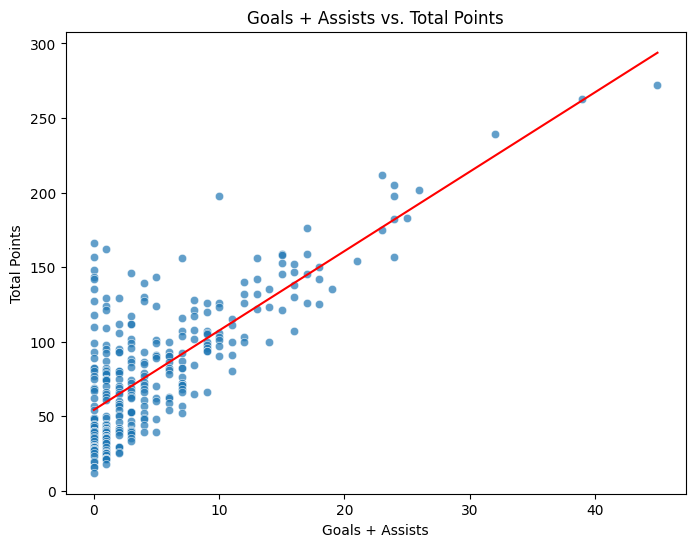

In [92]:
# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='goals_assists', y='total_points', marker='o', alpha=0.7)
plt.xlabel('Goals + Assists')
plt.ylabel('Total Points')
plt.title('Goals + Assists vs. Total Points')

# Add the regression line
X = data[['goals_assists']]
y = data['total_points']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')

# Calculate and print the R-squared value and correlation coefficient
r2 = r2_score(y, y_pred)
corr = data['goals_assists'].corr(data['total_points'])
print('R-squared value: {:.2f}'.format(r2))
print('Correlation coefficient: {:.2f}'.format(corr))

# Show the plot
plt.show()

#### R-squared value of 0.58 and correlation coefficient of 0.76 show that goals+assists is a reasonably good predictor of total points.

#### Now going to briefly investigate the distribution of bonus points

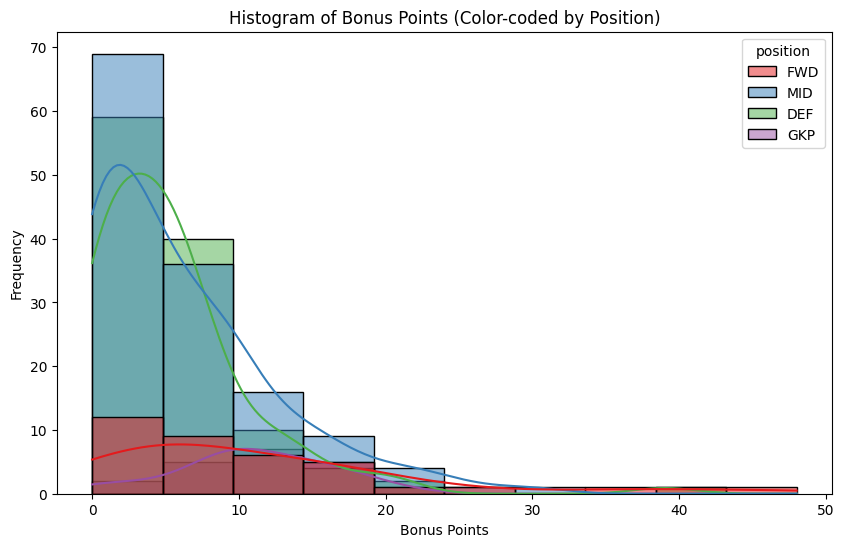

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='bonus', hue='position', bins=10, kde=True, palette='Set1')

# Add labels and title
plt.xlabel('Bonus Points')
plt.ylabel('Frequency')
plt.title('Histogram of Bonus Points (Color-coded by Position)')

# Show the plot
plt.show()

In [63]:
#Assigning point values for each position and clean sheets
point_values = {'DEF': {'goals_scored': 6, 'assists': 3, 'clean_sheets': 6},
               'MID': {'goals_scored': 5, 'assists': 3, 'clean_sheets': 1},
               'FWD': {'goals_scored': 4, 'assists': 3, 'clean_sheets': 0}}

# Initialize a dictionary to store the percentage for each position and category
percentage_dict = {}

# Iterating over each position category
for position in ['DEF', 'MID', 'FWD']:
    # Filtering the DataFrame by position
    position_df = data[data['position'] == position]

    # Calculating the points for goals, assists, and clean sheets for the position
    goals_points = position_df['goals_scored'].sum() * point_values[position]['goals_scored']
    assists_points = position_df['assists'].sum() * point_values[position]['assists']
    clean_sheets_points = position_df['clean_sheets'].sum() * point_values[position]['clean_sheets']

    # Calculating the total points for the position
    total_points_position = position_df['total_points'].sum()

    # Calculating the percentage relative to 'total_points'
    percentage_goals = (goals_points / total_points_position) * 100
    percentage_assists = (assists_points / total_points_position) * 100
    percentage_clean_sheets = (clean_sheets_points / total_points_position) * 100

    # Storing the percentage in the dictionary
    percentage_dict[position] = {
        'goals': percentage_goals,
        'assists': percentage_assists,
        'clean_sheets': percentage_clean_sheets
    }

# Printing the percentage for each position and category
for position, percentages in percentage_dict.items():
    print(f"{position}:")
    print(f"  Goals: {percentages['goals']}%")
    print(f"  Assists: {percentages['assists']}%")
    print(f"  Clean Sheets: {percentages['clean_sheets']}%")

DEF:
  Goals: 5.767124954374012%
  Assists: 5.365616255018859%
  Clean Sheets: 53.583160968487654%
MID:
  Goals: 20.73692482319043%
  Assists: 12.677900986641056%
  Clean Sheets: 7.500218283419191%
FWD:
  Goals: 33.943621040395236%
  Assists: 10.636442894507411%
  Clean Sheets: 0.0%


In [64]:
def calculate_percentage_by_position(data):
    # Assigning point values for each position and clean sheets
    point_values = {'DEF': {'goals_scored': 6, 'assists': 3, 'clean_sheets': 6},
                   'MID': {'goals_scored': 5, 'assists': 3, 'clean_sheets': 1},
                   'FWD': {'goals_scored': 4, 'assists': 3, 'clean_sheets': 0}}

    # Initialize a dictionary to store the percentage for each position and category
    percentage_dict = {}

    # Iterating over each position category
    for position in ['DEF', 'MID', 'FWD']:
        # Filtering the DataFrame by position
        position_df = data[data['position'] == position]

        # Calculating the points for goals, assists, and clean sheets for the position
        goals_points = position_df['goals_scored'].sum() * point_values[position]['goals_scored']
        assists_points = position_df['assists'].sum() * point_values[position]['assists']
        clean_sheets_points = position_df['clean_sheets'].sum() * point_values[position]['clean_sheets']

        # Calculating the total points for the position
        total_points_position = position_df['total_points'].sum()

        # Calculating the percentage relative to 'total_points'
        percentage_goals = (goals_points / total_points_position) * 100
        percentage_assists = (assists_points / total_points_position) * 100
        percentage_clean_sheets = (clean_sheets_points / total_points_position) * 100

        # Storing the percentage in the dictionary
        percentage_dict[position] = {
            'goals': percentage_goals,
            'assists': percentage_assists,
            'clean_sheets': percentage_clean_sheets
        }

    return percentage_dict

# Call the function to calculate percentages
percentage_by_position = calculate_percentage_by_position(data)

# Printing the percentage for each position and category
for position, percentages in percentage_by_position.items():
    print(f"{position}:")
    print(f"  Goals: {percentages['goals']}%")
    print(f"  Assists: {percentages['assists']}%")
    print(f"  Clean Sheets: {percentages['clean_sheets']}%")

DEF:
  Goals: 5.767124954374012%
  Assists: 5.365616255018859%
  Clean Sheets: 53.583160968487654%
MID:
  Goals: 20.73692482319043%
  Assists: 12.677900986641056%
  Clean Sheets: 7.500218283419191%
FWD:
  Goals: 33.943621040395236%
  Assists: 10.636442894507411%
  Clean Sheets: 0.0%


#### Define a custom function to calculate the percentage of total points accounted for by goals, assists, clean sheets for individual players

In [71]:
def calculate_percentage_by_position(data, player_name):
    # Assigning point values for each position and clean sheets
    point_values = {'DEF': {'goals_scored': 6, 'assists': 3, 'clean_sheets': 6},
                   'MID': {'goals_scored': 5, 'assists': 3, 'clean_sheets': 1},
                   'FWD': {'goals_scored': 4, 'assists': 3, 'clean_sheets': 0}}

    # Filter the DataFrame for the specific player
    player_data = data[data['name'] == player_name]

    # Ensure player exists in the DataFrame
    if player_data.empty:
        print(f"Player '{player_name}' not found in the DataFrame.")
        return

    # Get the player's position
    player_position = player_data['position'].iloc[0]

    # Calculate the points for goals, assists, and clean sheets for the player
    goals_points = player_data['goals_scored'].sum() * point_values[player_position]['goals_scored']
    assists_points = player_data['assists'].sum() * point_values[player_position]['assists']
    clean_sheets_points = player_data['clean_sheets'].sum() * point_values[player_position]['clean_sheets']

    # Calculate the total points for the player
    total_points_player = player_data['total_points'].sum()

    # Calculate the percentage relative to 'total_points'
    percentage_goals = (goals_points / total_points_player) * 100
    percentage_assists = (assists_points / total_points_player) * 100
    percentage_clean_sheets = (clean_sheets_points / total_points_player) * 100

    # Print the percentage for the specific player
    print(f"Player: {player_name}")
    print(f"Position: {player_position}")
    print(f"Goals Contribution: {percentage_goals:.2f}%")
    print(f"Assists Contribution: {percentage_assists:.2f}%")
    print(f"Clean Sheets Contribution: {percentage_clean_sheets:.2f}%")

In [72]:
# Call the function to calculate percentages for Erling Haaland
calculate_percentage_by_position(data, 'Erling Haaland')

Player: Erling Haaland
Position: FWD
Goals Contribution: 52.94%
Assists Contribution: 9.93%
Clean Sheets Contribution: 0.00%


Haaland (record goal scorer) has more than 50% of his points from goals scored.

In [66]:
calculate_percentage_by_position(data, 'Mohamed Salah')

Player: Mohamed Salah
Position: MID
Goals Contribution: 39.75%
Assists Contribution: 16.32%
Clean Sheets Contribution: 5.44%


In [67]:
calculate_percentage_by_position(data, 'Kieran Trippier')

Player: Kieran Trippier
Position: DEF
Goals Contribution: 3.03%
Assists Contribution: 13.64%
Clean Sheets Contribution: 48.48%


Unsurprisingly, Trippier (a defender) has Clean Sheets as the highest contributor to his total points.

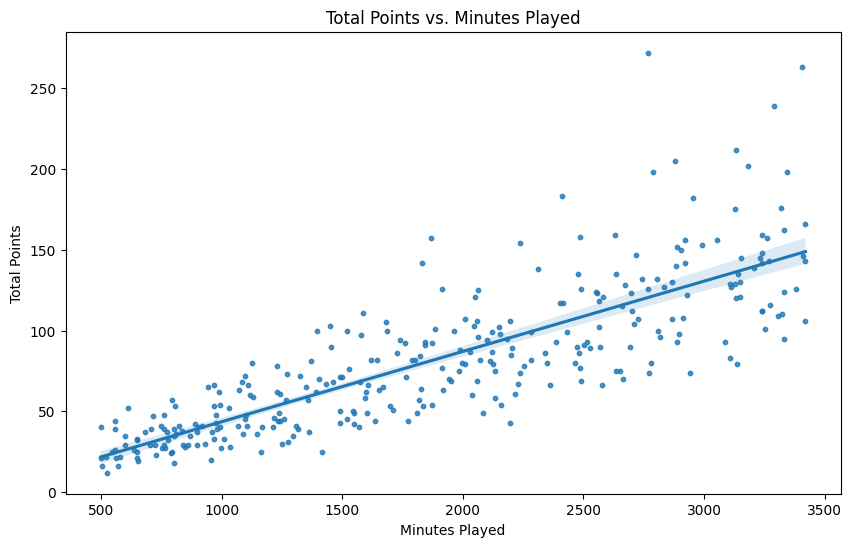

R-squared: 0.6676747950552615


In [93]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=data, x='minutes', y='total_points', scatter_kws={"s": 10})

# Add labels and title
plt.xlabel('Minutes Played')
plt.ylabel('Total Points')
plt.title('Total Points vs. Minutes Played')

# Show the plot
plt.show()

# Fit a linear regression model
model = LinearRegression()
X = data[['minutes']]
y = data['total_points']
model.fit(X, y)

# Compute predictions and R-squared
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)
print('R-squared:', r2)

As you would expect, there is a strong linear relationship between minutes played and total points scored, with R-squared value of 0.67.